###  Final Project : New York Taxi Price Fare Prediction

-- By Manasa, Saketh and Siddharth

---------------------------------------------------------------------------------------------------------------------

Data set can be found here :
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/download/test.csv

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/download/train.csv


First let us start by importing by the necessary packages and libraries.

In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import datetime as dt

The dataset is 55 million rows so it takes a lot of time to process that so we intially take a part of it.


.

.

### Read data using Pandas

In [8]:
data=pd.read_csv("/Users/siddharthchittoor/Documents/Semester 2/Data Analytics/final project/train.csv",nrows=2000000)
test=pd.read_csv("/Users/siddharthchittoor/Documents/Semester 2/Data Analytics/final project/test.csv")

.

.

.

# Data Exploration and Cleaning

### The following things which exploration and cleaning pertains are done:
  1. Datatype checks
  2. Shape checks
  3. Check for Nan values
  4. Check for outliers
  5. Cleaning the data pertaining to each attribute in the training set

In [9]:
data.shape

(2000000, 8)

The data we have considered contains 2 million rows and 8 columns

In [10]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


By calling the describe method we can get an overlay of the data 

.

.

.

Data types of our attributes

In [12]:
data.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

##### We see if any of the data has missing values, we call isnull() for that 

In [13]:
null_data=data.isnull().sum()
print(null_data)

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


We see that dropoff latituted and dropoff longititude has 14 missing values in each of them, so we drop them

In [14]:
data = data.dropna(how = 'any', axis = 'rows')

In [15]:
data.shape

(1999986, 8)

In [16]:
data['passenger_count'].describe()

count    1.999986e+06
mean     1.684125e+00
std      1.314979e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

Text(0.5, 1.0, 'Passenger Count Bar Graph')

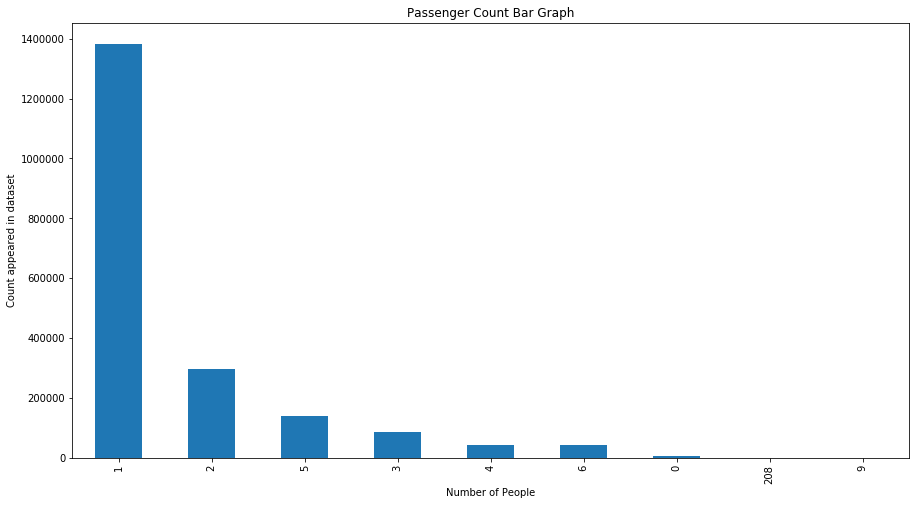

In [17]:
#To better visualize the data we plot it in a barchart
plt.figure(figsize=(15,8))
data['passenger_count'].value_counts().plot.bar()
plt.xlabel('Number of People')
plt.ylabel('Count appeared in dataset')
plt.title('Passenger Count Bar Graph')

##### As we can see the max value of ' passenger_count ' is about 208 which is quite absurd as even if we consider a bus operating as a taxi, it's max capacity would be of around 60.
#### passenger_count ' for 1 to 6 have a significant count, Let's try to find the rides which have more than 6 passengers and analyze.

In [18]:
data[data['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.00000,0.00000,0.00000,0.00000,208
1007609,2014-06-24 15:13:00.00000040,104.0,2014-06-24 15:13:00 UTC,-74.01578,40.71542,-74.17028,40.70834,9


We have two rows with 9 and 208 which are outliners so we drop it

In [19]:
data.shape

(1999986, 8)

Now we decribe the ' passenger_count ' column and check if the max passengers are 6.

In [20]:
data['passenger_count'].describe()

count    1.999986e+06
mean     1.684125e+00
std      1.314979e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

.

.

#### Note:

We have small amount of rides with passengers 0 too, this might be the case of cancelling the ride after the taxi has reached the pickup location, we cannot drop this data as these might have potential information. We will deal with this case when we are cleaning latitude and longitude data


.

Let us look at the fare amount now

In [21]:
data['fare_amount'].describe()

count    1.999986e+06
mean     1.134768e+01
std      9.852609e+00
min     -6.200000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

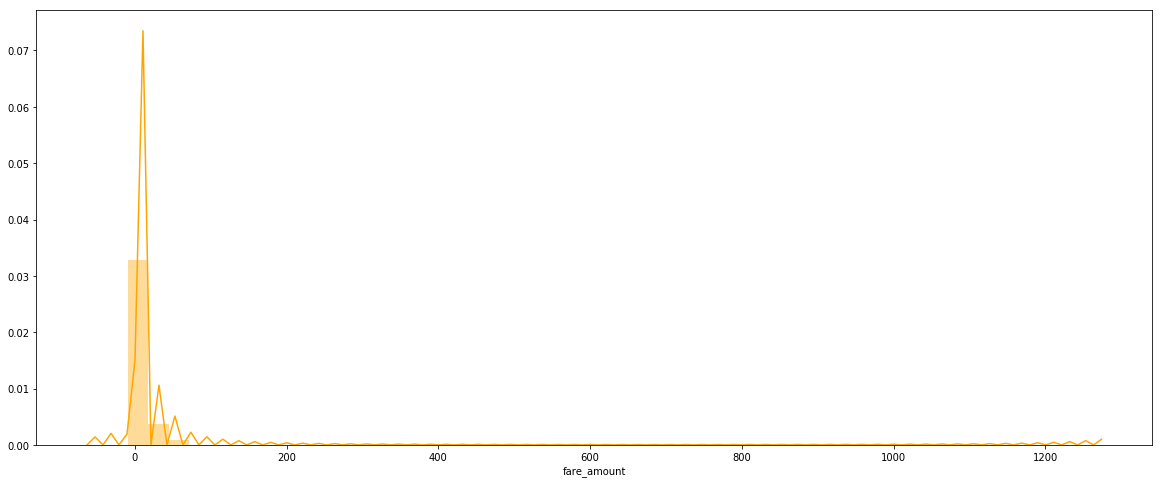

In [22]:
plt.figure(figsize=(20,8))
sea.distplot(data.fare_amount,color="orange")



#### As we can see the ' fare_amount ' is not normally distributed 
###### A lot of fares agglomerate near the range of [ 0 , 80 ]
###### The max fare is about a whooping more than $1200


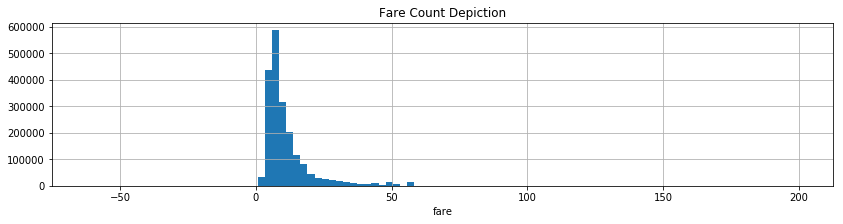

In [23]:
data[data.fare_amount<200].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare')
plt.title('Fare Count Depiction');

.

.

In [24]:
fare_less_than_zero=data[data['fare_amount']<0]

In [25]:
fare_less_than_zero.shape

(77, 8)

We see that 77 rows have fare which is less than 0. We drop them as the fare can't be less than zero.

In [26]:
data=data[data['fare_amount']>=0]

In [27]:
data.shape

(1999909, 8)

In [28]:
data['fare_amount'].sort_values(ascending=False)

1144706    1273.31
101885      500.00
247671      495.00
1215047     488.00
233874      450.00
329010      450.00
287638      450.00
1950951     430.00
451974      400.00
361793      400.00
1901979     386.08
951810      347.54
1004275     325.00
1961485     315.00
1124533     290.25
578919      287.08
130460      281.05
1258548     271.00
309769      263.25
719764      262.04
1117742     260.00
1484329     258.00
142550      255.00
888472      250.25
1474125     250.00
351584      250.00
217225      245.41
786490      243.00
149769      240.00
1729099     236.25
            ...   
1878626       0.00
788466        0.00
1530388       0.00
1249746       0.00
1662545       0.00
1161016       0.00
1634619       0.00
670254        0.00
1296011       0.00
1598058       0.00
1729974       0.00
762802        0.00
895361        0.00
1709610       0.00
957590        0.00
1239525       0.00
1920170       0.00
1614540       0.00
331597        0.00
105051        0.00
1865880       0.00
561786      

.

### Now let us deal with drop off latitudes and longitudes

In [29]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999909e+06,1.999909e+06,1.999909e+06,1.999909e+06,1.999909e+06,1.999909e+06
mean,1.134841e+01,-7.252329e+01,3.992968e+01,-7.252415e+01,3.992819e+01,1.684123e+00
std,9.851787e+00,1.286792e+01,7.983332e+00,1.277449e+01,1.032374e+01,1.314976e+00
min,0.000000e+00,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


As we check the data we have min values ranging around -3400 which is not defined and these pertain to outliers.


The max values also have a certain outliers being max values around 3000.


Now what we try to do is that we check the min and max values of latitudes and longitudes of the test data and then filter our training dataset inside [ min , max ] range.


Let us find the min and max of the test data.

In [30]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [31]:
min(test.pickup_longitude.min(), test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(), test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [32]:
min(test.pickup_latitude.min(), test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(), test.dropoff_latitude.max())

(40.568973, 41.709555)

Now we got the extremes of the test data of long' and lat', we now restrict our train data rows to this range.

We use Dataframe.loc to access the group with the limits we put and only keep them in data.

In [33]:
data = data.loc[data['pickup_longitude'].between(-74.3, -72.9)]
data = data.loc[data['dropoff_longitude'].between(-74.3, -72.9)]
data = data.loc[data['dropoff_latitude'].between(40.5, 41.7)]
data = data.loc[data['pickup_latitude'].between(40.5, 41.7)]

In [35]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06
mean,1.132490e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684247e+00
std,9.682213e+00,3.845336e-02,2.956141e-02,3.758561e-02,3.272666e-02,1.306714e+00
min,0.000000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00


In [36]:
data.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

.

The pickup_datetime is in ' object ' type, we convert it into datetime format so as to parse various day functions from it.

In [37]:
def convert_to_datetime(df):
    test_time = df['pickup_datetime'].astype(str).str[:-4]
    df['date_time'] = pd.to_datetime(test_time, format='%Y%m%d %H:%M:%S')
    return df
data = convert_to_datetime(data)
test = convert_to_datetime(test)

In [38]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06
mean,1.132490e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684247e+00
std,9.682213e+00,3.845336e-02,2.956141e-02,3.758561e-02,3.272666e-02,1.306714e+00
min,0.000000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00


In [39]:
def extract_date(data):
    data['hour'] = data['date_time'].dt.hour
    data['day'] = data['date_time'].dt.day
    data['month'] = data['date_time'].dt.month
    data['year'] = data['date_time'].dt.year
    data['day_of_week'] = data['date_time'].dt.weekday
    # data = data.drop(['date_time','pickup_datetime'], axis=1)
    return data

data = extract_date(data)
test = extract_date(test)

In [40]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
count,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06
mean,1.132490e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684247e+00,1.350850e+01,1.570592e+01,6.269440e+00,2.011737e+03,3.041281e+00
std,9.682213e+00,3.845336e-02,2.956141e-02,3.758561e-02,3.272666e-02,1.306714e+00,6.513962e+00,8.682198e+00,3.437977e+00,1.863406e+00,1.949913e+00
min,0.000000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00


In [41]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,13.467420,16.194170,6.857979,2011.815816,2.852834
std,0.042774,0.033541,0.039072,0.035435,1.278747,6.868584,8.838482,3.353272,1.803347,1.994451
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,8.000000,9.000000,4.000000,2010.000000,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,15.000000,16.000000,7.000000,2012.000000,3.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,19.000000,25.000000,10.000000,2014.000000,5.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


.

## Distance calculation
 ##### - We will calculate distance now as it is important in determining the fare of the ride.
 ##### - We try to use haversine distance which is a slight tweek to euclidean distance considering the cosine angle of the latitudes as the latitudes gap is more near equator and descreases as we approach noth pole.
 ##### - The reason for this consideration is that, it might be simple to use euclidean on a high level but the distance between each longitude is about 69 miles which is a lot. 
 ##### - As distance is very import for us, we try to be as precise as possible. 
 ##### - There is a specific method in ' geopy ' library for distance calculation but takes too much of time.

In [42]:
def distance(lat1, long1, lat2, long2):
    x = [data, test]
    for i in x:
#R = 6371 #radius of earth in kilometers
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
#a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) *np.sin(delta_lambda / 2.0) ** 2
#c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#d = R*c
        d = (R * c) #in miles
        i['distance'] = d
    return d


In [43]:
distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        1.443696
1        1.507137
2        0.384421
3        1.218604
4        3.347720
5        2.002523
6        0.577663
7       13.385224
8        2.407317
9        0.683422
10       1.440232
11       2.994683
12       0.449074
13       1.041174
14       1.556030
15       3.178743
16       0.185701
17       1.572879
18       0.484976
19       0.265517
20       1.026535
21       1.223686
22       0.811214
23       1.181482
24       3.591573
25       0.697027
26       8.890220
27       5.858568
28       0.711221
29       2.918369
          ...    
9884     9.395273
9885     3.110925
9886     4.583985
9887     1.044416
9888     0.000000
9889     1.477539
9890     1.829791
9891     3.699151
9892     1.833382
9893     2.942607
9894     1.927215
9895     5.592887
9896     1.490240
9897     3.157794
9898     0.345060
9899     3.486422
9900     1.174842
9901     0.950830
9902     2.418231
9903     1.428817
9904     9.377854
9905     5.974105
9906     0.229615
9907     6.166867
9908     1

In [44]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance
count,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06,1.957776e+06
mean,1.132490e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684247e+00,1.350850e+01,1.570592e+01,6.269440e+00,2.011737e+03,3.041281e+00,2.067937e+00
std,9.682213e+00,3.845336e-02,2.956141e-02,3.758561e-02,3.272666e-02,1.306714e+00,6.513962e+00,8.682198e+00,3.437977e+00,1.863406e+00,1.949913e+00,2.344364e+00
min,0.000000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00,7.789226e-01
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00,1.337215e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00,2.431992e+00
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00,7.133064e+01


In [45]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,13.467420,16.194170,6.857979,2011.815816,2.852834,2.134772
std,0.042774,0.033541,0.039072,0.035435,1.278747,6.868584,8.838482,3.353272,1.803347,1.994451,2.468471
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,8.000000,9.000000,4.000000,2010.000000,1.000000,0.806762
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,15.000000,16.000000,7.000000,2012.000000,3.000000,1.377921
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,19.000000,25.000000,10.000000,2014.000000,5.000000,2.513789
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,62.138491


.

.

### Pearson Correlation

Distance of the ride and the taxi fare 



Time of day and distance traveled 

Time of day and the taxi fare

In [46]:
import scipy.stats as stats

.

 We use the ' stats.pearsonr ' to calculate the pearson coefficient.
 

pearsonr() returns a two-tuple consisting of the correlation coefficient and the corresponding p-value. 
 

The correlation coefficient can range from -1 to +1.


 The null hypothesis is that the two variables are uncorrelated. 


The p-value is a number between zero and one that represents the probability that your data would have arisen if the null hypothesis were true.

In [47]:
stats.pearsonr(data['distance'], data['fare_amount'])

(0.8173586911998936, 0.0)

Text(0, 0.5, 'Fare')

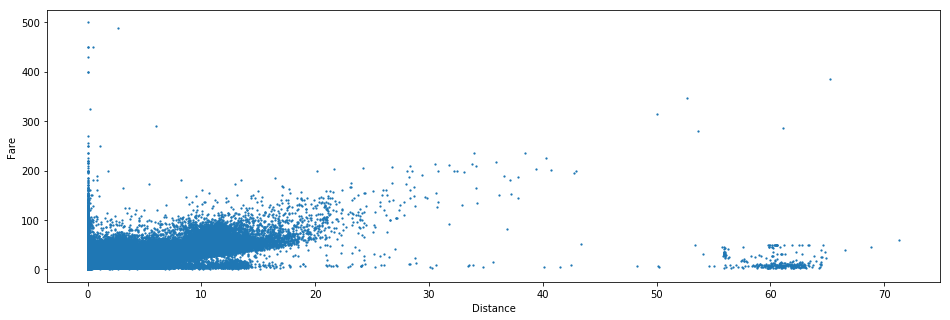

In [48]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['distance'], y=data['fare_amount'], s=1.5)
plt.xlabel('Distance')
plt.ylabel('Fare')

### From the plot it is clearly evident that : Linear Relation 
    - There are trips with zero distance but with a non-zero fare. How can a trip end at the same location of  pickup?     
    
    - May be the dropoff location is updated as pickup location mistakely or something else.
    
    - There are quite a few trips with distances of ~60 miles but the fare is pretty less. 
    
    - There might be different reasons like 'no traffic congession', 'no tolls', 'rider applied discount coupon', 'outstation trips which cost less for more miles we travel as fare/mile ratio will be decreased as norms cab company
    
    -Overall, we generically say that there is a linear relationship between distance and fare amount since pearson returned 0.82 which is close to 1 (directly related) and the plot evidently checks out a linear relationship.
    
    - Although there might be a vague discussion of relationship of the right side fewer dots but generically we can call it a linear one. 


The scatterplot in the distance range of [ 0 , 20 ] is not clear, let us try to limit the distance and fare values so as to get a deeper look.

In [49]:
stats.pearsonr(data['hour'], data['distance'])

(-0.029073361255766345, 0.0)

In [50]:
 stats.pearsonr(data['hour'], data['fare_amount'])

(-0.018158404085667653, 1.984541853955591e-142)

Text(0, 0.5, 'Distance')

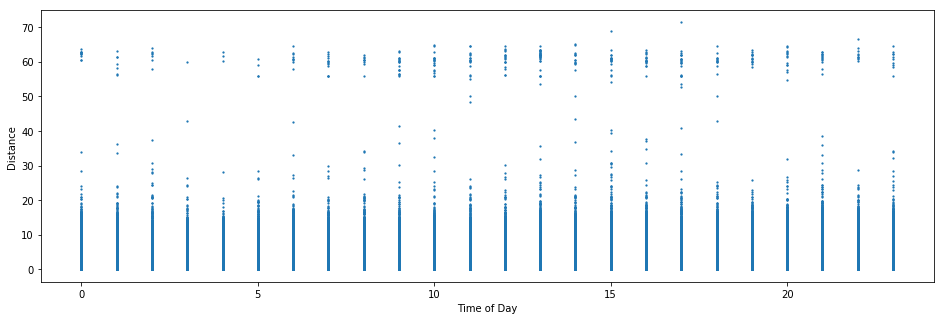

In [51]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['hour'], y=data['distance'], s=1.5)
plt.xlabel('Time of Day')
plt.ylabel('Distance')

#### From the plot it is evident that: Non Linear
##### The relationship is vague and cannot be accurately determined as we cannot clearly depict it is a linear relationship rather but it is mostly non-linear.

##### We can observe that people travelled less distance between 3 AM to 5 AM. This is obvious because most people will sleep during this time.

##### People travelled more distances during 9 AM to 10 AM in the morning and 3PM to 5PM. This can be justified like in the morning people tend to get late for office and might hail a cab from long distances to compensate the time. In the evening people might leave early to their place as to avoid traffic or they might feel tired to travel.

##### If we limit the distance to < 40 miles we can say it will be a non- linear relationship as the graph does not fit in the y=mx + c equation.


Text(0, 0.5, 'Fare')

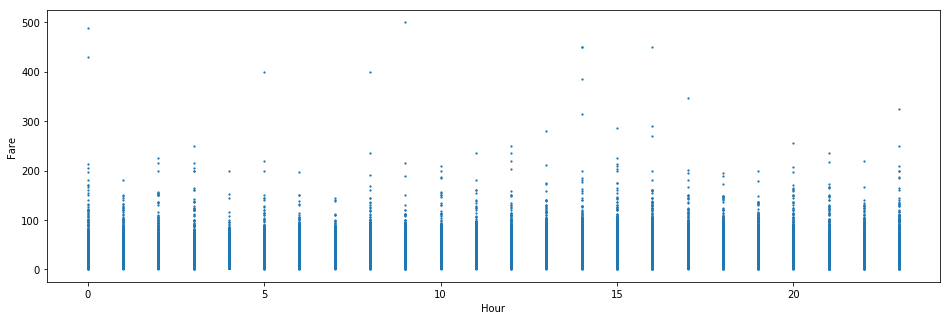

In [52]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['hour'], y=data['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

### From the plot it is evident that: Non Linear
The relationship is vague and cannot be accurately determined as we cannot clearly depict it is a linear relationship rather but it is mostly non-linear.
##### We can observe that the fares at 12AM, 5AM to 10AM and 2PM to 5PM, 8PM are high.
This can be the reason of surge in the area, like at 12AM it might be a friday or saturday night people might go clubbing and wanted to return home but the cabs were at a surge due to unavailability and they book it anyway as they might be wasted!!!
##### 5AM to 10AM, 2PM to 5PM and 8PM, the new york taxis will be on a definte surge as these are the time range when people go and leave their offices.

#### Highest Correlation : ' Distance ' and ' Fare Amount '
The correlation between distance and fare_amount is the highest about 0.82 (pearson coefficient). This is clearly obvious as the fare amount is and will always be dependent on distance travelled. Basic formula for fare calculation is,
####             fare amount = ( base fare ) + ( distance ) * (generalized rate / 1mile)
The fare also depends on other metrics like tolls, traffic waiting time and few other things.
Let us try to analyze the the feature dependencies by exploring the metrics and plotting them to find a trend. Let us try to plot the 'fare amount' for a 'day' for all the 'years' in the training data.

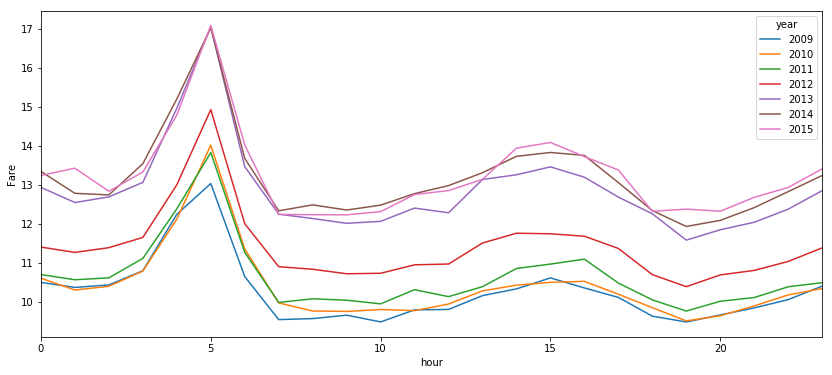

In [53]:
data.pivot_table('fare_amount', index='hour', columns='year').plot(figsize=(14,6))
plt.ylabel('Fare');

#### From the plot it is evident that:
There is a huge increare in the taxi fare rates from the year 2009 to 2015.
The peak time ( in this plot ~5AM and 2PM to 5PM) the plotting lines over the years overlap due to surge pricing but the for the remaining time period it is pretty consistent.
#### This will cause a problem in predicting the fare amounts for the test data as in the fare amount will be inconsistant over the distance and the time of day the cab is taken.
We either need to model using each year seperately or group the years which have a less gradient or add a little inflation to this year fares and then use them in the model for more accurate predictions.

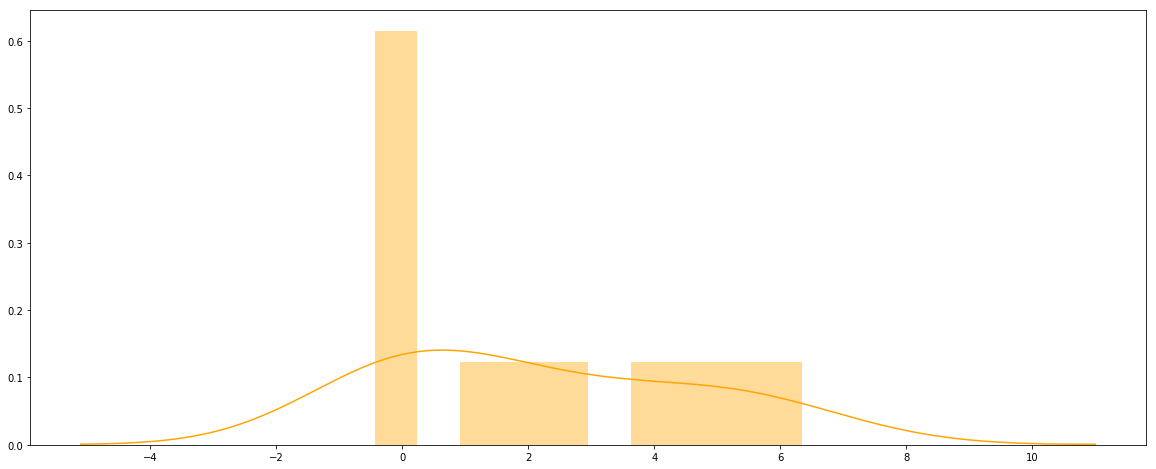

In [54]:
skew_data = data.skew()
plt.figure(figsize=(20,8))
sea.distplot(skew_data, bins=10, kde=True, color="orange")


From the above graph we can observe that there is slight bit of positive skew in our training data i.e the mean is greater than the median and our outliers lie to the right.

Text(0, 0.5, 'Fare')

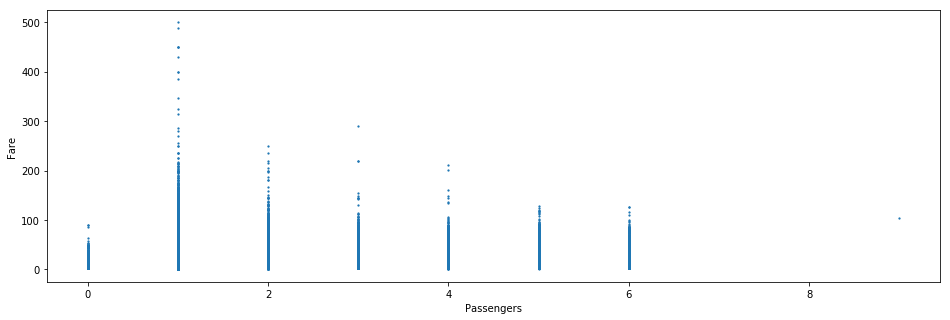

In [55]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1.5)
plt.xlabel('Passengers')
plt.ylabel('Fare')

.

.

.

This is the graph plotted between the fare_amount and the passenger_count to get a gist of the relation. We cannot identify any specific trend in the plotting but we can see that single passengers are the ones who take cab the most and the highest fare is also for the taxi with single passenger.

Text(0, 0.5, 'frequency count')

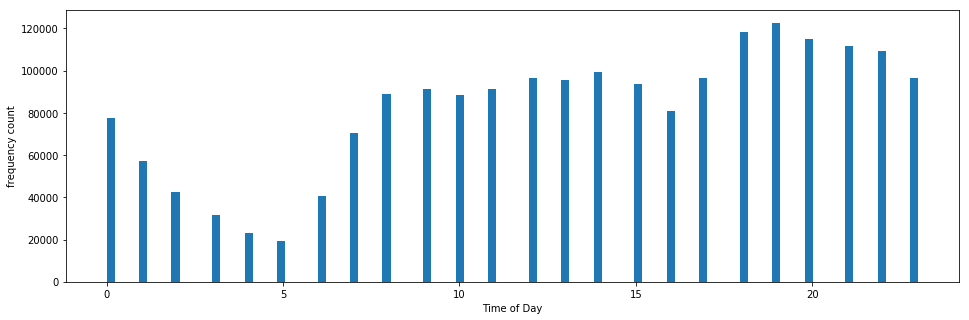

In [56]:
plt.figure(figsize=(16,5))
plt.hist(data['hour'], bins=100)
plt.xlabel('Time of Day')
plt.ylabel('frequency count')

##### This is the plot for the time of day frequency count in our training dataset.
In the previous plot between time of day and fare amount we observed the fare is high during peak period and assumed it as it might be surge pricing or unavailability.
##### Now the above graph justifies our assumption of surge pricing, as we can see that the frequency of taxis taken from 8AM to 11AM and gradually increases from 6PM and peaks at 8PM.
The taxis requested are more and thus the surge as the taxis will be less further on.

.

.

.

##### Let us create a plot for day_of_week metric:
This is from the assumption that most of the taxi companies have different fares for weekdays and on the weekends.

Text(0, 0.5, 'Frequency Count')

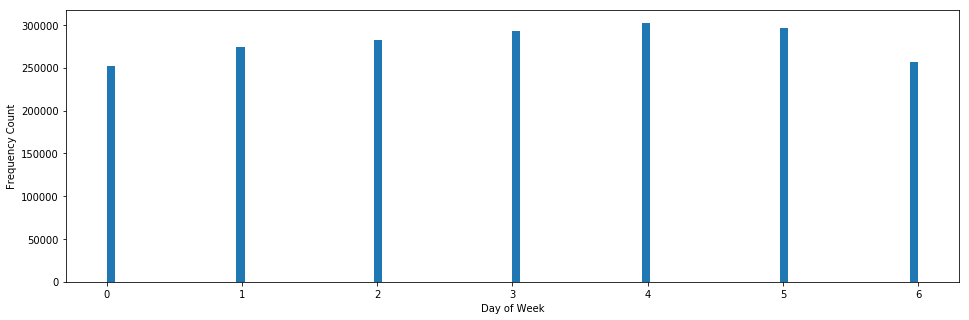

In [57]:
plt.figure(figsize=(16,5))
plt.hist(data['day_of_week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency Count')

.

 0 - Sunday ; 1 - Monday ; 2 - Tuesday ; 3 - Wednesday ; 4 - Thursday; 5 - Friday ; 6 - Saturday



 From the above graph we can see that there is not clear cut assumption we can presume, rather that Thursday we have more number of taxi rides and Sunday, Saturday there are less, may be people just taking rest for the weekend due to hectic work or not travelling.

Now let us plot the day_of_week with the fare_amount, let's see we can find something.


Text(0, 0.5, 'Fare Amount')

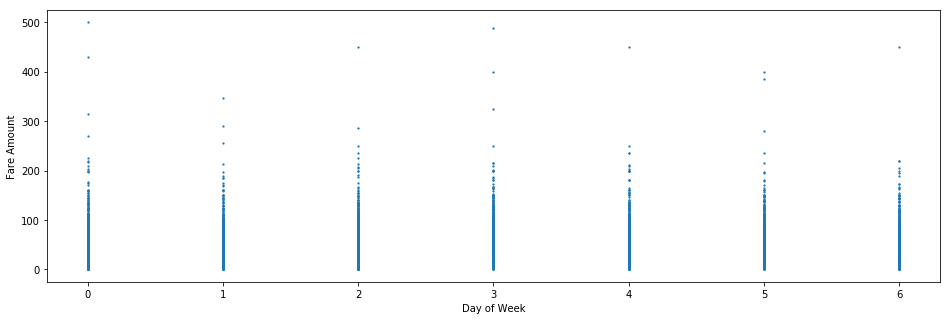

In [58]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['day_of_week'], y=data['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

The fares on Sunday and Wednesday seem to be highest and are the least on Monday.

.

.


.

In [59]:
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'date_time', 'hour', 'day', 'month', 'year',
       'day_of_week', 'distance'],
      dtype='object')

Text(0, 0.5, 'Fare Amount')

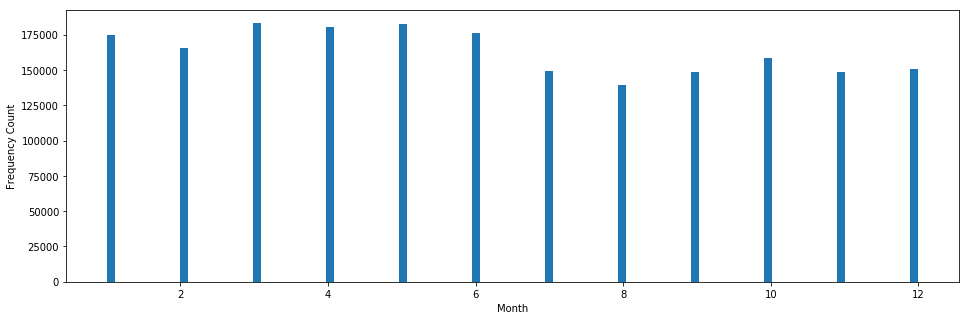

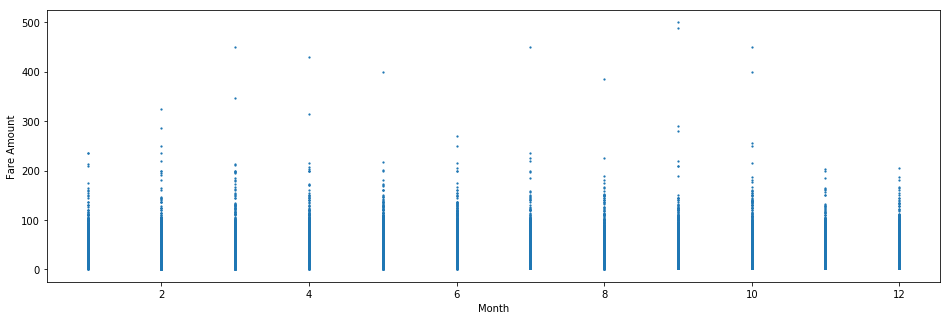

In [60]:
# Frequency count of the taxi rides in specific months
plt.figure(figsize=(16,5))
plt.hist(data['month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency Count')
plt.figure(figsize=(16,5))
plt.scatter(x=data['month'], y=data['fare_amount'], s=1.5)
plt.xlabel('Month')
plt.ylabel('Fare Amount')

The above graphs are plotted to get a sense or gist of the seasonal pricing.


But unfortunately we cannot detect any trends in the fare amounts categorical to month.


We can find the taxi fares to be reaching maximun in the month of September, may be due to a long weekend travel plans? May be!!!


Let us calculate absolute difference between latitudes and longitudes. This is because we have distance=0 but fare is not 0, which is absurd

In [61]:
data['abs_diff_longitude'] = (data['pickup_longitude'] - data['dropoff_longitude']).abs()
data['abs_diff_latitude'] = (data['pickup_latitude'] - data['dropoff_latitude']).abs()
test['abs_diff_longitude'] = (test['pickup_longitude'] - test['dropoff_longitude']).abs()
test['abs_diff_latitude'] = (test['pickup_latitude'] - test['dropoff_latitude']).abs()

Text(0, 0.5, 'Fare Amount')

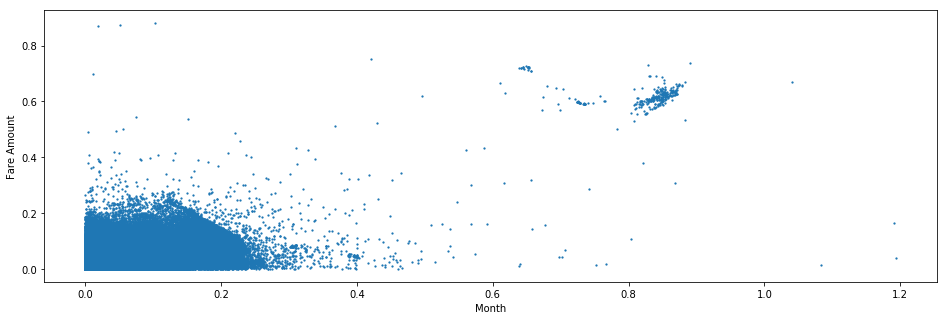

In [62]:
plt.figure(figsize=(16,5))
plt.scatter(x=data['abs_diff_longitude'], y=data['abs_diff_latitude'], s=1.5)
plt.xlabel('Month')
plt.ylabel('Fare Amount')

In [63]:
stats.pearsonr(data['abs_diff_longitude'], data['fare_amount'])

(0.7736180904178745, 0.0)

In [62]:
stats.pearsonr(data['abs_diff_latitude'], data['fare_amount'])

(0.6022345368398039, 0.0)

In [64]:
dist_zero=data[data['distance']==0]
print(dist_zero)

                                   key  fare_amount          pickup_datetime  \
105        2009-03-25 00:08:52.0000001        52.00  2009-03-25 00:08:52 UTC   
191        2014-01-08 21:55:58.0000006         6.50  2014-01-08 21:55:58 UTC   
270        2012-08-25 01:53:42.0000005         7.50  2012-08-25 01:53:42 UTC   
290       2009-12-14 12:33:00.00000075         6.90  2009-12-14 12:33:00 UTC   
396        2014-03-12 18:12:44.0000006        12.00  2014-03-12 18:12:44 UTC   
503       2010-01-19 01:10:00.00000012         2.50  2010-01-19 01:10:00 UTC   
657        2009-08-25 01:50:21.0000001         2.50  2009-08-25 01:50:21 UTC   
737      2014-08-11 19:37:00.000000174        57.33  2014-08-11 19:37:00 UTC   
808        2010-10-22 02:24:53.0000001         6.10  2010-10-22 02:24:53 UTC   
843       2014-07-19 04:42:00.00000041         5.50  2014-07-19 04:42:00 UTC   
1124       2010-10-14 21:12:17.0000004        10.10  2010-10-14 21:12:17 UTC   
1214       2011-08-16 07:04:05.0000001  

In [69]:
data.shape

(1957771, 17)

There are 20776 rows which is a huge number to just delete the data, but can we do is that as we know fare amount we can try to get the distance by the below mentioned formula,
                        fare amount = ( base fare ) + ( distance )* (fare / mile)


From here, we can calculate distance as,
                         distance = ((fare amount) - ( base fare) ) / (fare / mile)


All we have to know is the fare amount, base fare and the fare/mile cost.
As per the source http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml
(http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml) ,


Base fare ( initial charge ) is $2.5. fare per mile is about $1.5.


There is a daily 50-cent surcharge from 8pm to 6am. There is a $1 surcharge from 4pm to 8pm on weekdays.
First we will set the minimun fare_amount of the taxi rides to be $2.5.

In [65]:
fare_less_than_base = data.loc[((data['distance']==0) & (data['fare_amount'] < 2.5))]
fare_less_than_base.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.0,5.0,5.0
mean,0.400000,-73.991683,40.739062,-73.991683,40.739062,1.200000,14.200000,15.600000,4.80000,2013.60000,2.600000,0.0,0.0,0.0
std,0.894427,0.055900,0.038664,0.055900,0.038664,0.447214,9.602083,11.865918,2.04939,2.19089,1.949359,0.0,0.0,0.0
min,0.000000,-74.043442,40.679971,-74.043442,40.679971,1.000000,2.000000,4.000000,3.00000,2010.00000,0.000000,0.0,0.0,0.0
25%,0.000000,-74.035278,40.738683,-74.035278,40.738683,1.000000,6.000000,5.000000,3.00000,2013.00000,2.000000,0.0,0.0,0.0
50%,0.000000,-73.994125,40.741131,-73.994125,40.741131,1.000000,18.000000,13.000000,5.00000,2015.00000,2.000000,0.0,0.0,0.0
75%,0.000000,-73.982354,40.747318,-73.982354,40.747318,1.000000,22.000000,27.000000,5.00000,2015.00000,4.000000,0.0,0.0,0.0
max,2.000000,-73.903214,40.788208,-73.903214,40.788208,2.000000,23.000000,29.000000,8.00000,2015.00000,5.000000,0.0,0.0,0.0


In [71]:
data=data.drop(fare_less_than_base.index, axis=0)

In [72]:
data.shape

(1957771, 17)

In [73]:
data=data[data['fare_amount']>=2.5]

In [74]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06
mean,1.132524e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684258e+00,1.350849e+01,1.570591e+01,6.269519e+00,2.011737e+03,3.041295e+00,2.067940e+00,2.278713e-02,2.131913e-02
std,9.682160e+00,3.844987e-02,2.956012e-02,3.758218e-02,3.272518e-02,1.306724e+00,6.513942e+00,8.682180e+00,3.437981e+00,1.863375e+00,1.949910e+00,2.344303e+00,3.519005e-02,2.415512e-02
min,2.500000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00,7.789511e-01,6.129000e-03,6.933000e-03
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00,1.337244e+00,1.269600e-02,1.416000e-02
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00,2.431993e+00,2.392000e-02,2.719600e-02
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00,7.133064e+01,1.193331e+00,8.809624e-01


Now we need to append the fare_amount where the distance is zero due to same pickup and dropoff longitudes.
We have 3 time periods
            

             Weekdays ( 6AM to 4PM ) & Weekends - 2.5 + distance * 1.5
             

             Weekdays ( 4PM to 8PM ) - 2.5 + 1 + distance * 1.5



             Weekdays & Weekends ( 8PM to 6AM) - 2.5 + 0.5 + distance * 1.5

In [73]:
data_dist_zero.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.0
mean,10.303354,-73.933231,40.766977,-73.933231,40.766977,1.487342,13.170886,15.588608,5.791139,2011.367089,2.797468,4.907770,0.0,0.0
std,13.867707,0.161056,0.114913,0.161056,0.114913,1.075123,6.476998,8.766707,3.284889,1.644735,1.967117,8.721829,0.0,0.0
min,2.500000,-74.181602,40.616788,-74.181602,40.616788,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.0,0.0
25%,4.900000,-73.990522,40.734843,-73.990522,40.734843,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.509434,0.0,0.0
50%,6.500000,-73.975454,40.751588,-73.975454,40.751588,1.000000,14.000000,15.000000,6.000000,2011.000000,3.000000,2.515723,0.0,0.0
75%,9.300000,-73.948569,40.768128,-73.948569,40.768128,1.750000,19.000000,23.000000,8.000000,2012.000000,4.000000,4.276730,0.0,0.0
max,96.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,58.805031,0.0,0.0


In [77]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06,1.957717e+06
mean,1.132524e+01,-7.397513e+01,4.075107e+01,-7.397424e+01,4.075142e+01,1.684258e+00,1.350849e+01,1.570591e+01,6.269519e+00,2.011737e+03,3.041295e+00,2.067940e+00,2.278713e-02,2.131913e-02
std,9.682160e+00,3.844987e-02,2.956012e-02,3.758218e-02,3.272518e-02,1.306724e+00,6.513942e+00,8.682180e+00,3.437981e+00,1.863375e+00,1.949910e+00,2.344303e+00,3.519005e-02,2.415512e-02
min,2.500000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399159e+01,4.073553e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00,7.789511e-01,6.129000e-03,6.933000e-03
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00,1.337244e+00,1.269600e-02,1.416000e-02
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00,2.431993e+00,2.392000e-02,2.719600e-02
max,5.000000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00,7.133064e+01,1.193331e+00,8.809624e-01


In [67]:
data=data[data['fare_amount']>3.0]

In [77]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000
mean,11.336494,-73.974973,40.751323,-73.973889,40.751867,1.647259,13.501572,15.665304,6.260438,2011.739437,3.035337,2.152182,0.023382,0.021613
std,9.461797,0.040117,0.030870,0.038712,0.033329,1.269038,6.512111,8.684618,3.446169,1.868739,1.968438,2.657238,0.037443,0.025630
min,3.300000,-74.229138,40.571310,-74.227047,40.543870,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000125,0.000000,0.000000
25%,6.000000,-73.992408,40.736609,-73.991342,40.736394,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,0.807913,0.006197,0.007162
50%,8.500000,-73.982088,40.753333,-73.980567,40.754252,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,1.378343,0.012858,0.014346
75%,12.500000,-73.968181,40.767793,-73.965531,40.768305,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,2.479198,0.024441,0.027121
max,165.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,62.821158,0.863547,0.634415


This is just an intuation step that the data will be linearly giving out the fare amounts. So, just considering the fare to be less than 200 and distance is limited to 100.

In [68]:
data=data[data['fare_amount']<200]

In [69]:
data=data[data['distance']<100]


In [70]:
data=data[data['passenger_count']>0]

In [71]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,distance,abs_diff_longitude,abs_diff_latitude
count,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06,1.935406e+06
mean,1.139513e+01,-7.397520e+01,4.075107e+01,-7.397431e+01,4.075142e+01,1.691508e+00,1.351453e+01,1.570532e+01,6.271567e+00,2.011740e+03,3.041047e+00,2.082180e+00,2.294759e-02,2.146194e-02
std,9.596067e+00,3.821234e-02,2.942282e-02,3.729699e-02,3.260965e-02,1.305837e+00,6.513442e+00,8.681720e+00,3.437677e+00,1.865419e+00,1.949761e+00,2.340143e+00,3.520140e-02,2.410302e-02
min,3.010000e+00,-7.429941e+01,4.050183e+01,-7.429973e+01,4.050029e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.100000e+00,-7.399229e+01,4.073655e+01,-7.399160e+01,4.073553e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00,7.894245e-01,6.260000e-03,7.071000e-03
50%,8.500000e+00,-7.398211e+01,4.075334e+01,-7.398063e+01,4.075384e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00,1.347526e+00,1.281000e-02,1.429100e-02
75%,1.250000e+01,-7.396841e+01,4.076752e+01,-7.396543e+01,4.076839e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00,2.445604e+00,2.405100e-02,2.734700e-02
max,1.995000e+02,-7.294086e+01,4.169685e+01,-7.290000e+01,4.169126e+01,9.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00,7.133064e+01,1.193331e+00,8.735150e-01


### Modelling
Let us start training our data and use Linear Regression Basemodel to predict the fare amounts
Initially we first check on the training data and check the rmse and then try to predict the values of the test data
We plot a heat map which gives the correlation coefficients so we can select features through this and the analysis we have done above.

.

.

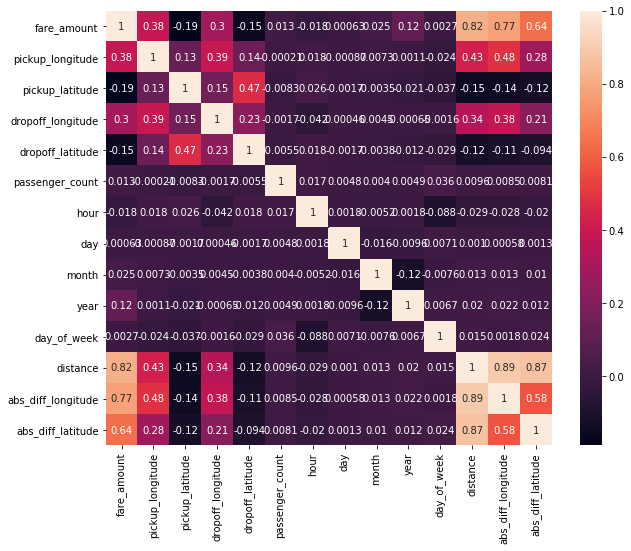

In [81]:
plt.figure(figsize=(10,8))
sea.heatmap(data.corr(), annot=True)

In [82]:
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'date_time', 'hour', 'day', 'month', 'year',
       'day_of_week', 'distance', 'abs_diff_longitude', 'abs_diff_latitude'],
      dtype='object')

In [83]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date_time',
       'hour', 'day', 'month', 'year', 'day_of_week', 'distance',
       'abs_diff_longitude', 'abs_diff_latitude'],
      dtype='object')

Assigning the values to the train set for X_train and Y_train.
The training data is split into train and test randomly using sklearn train_test_split


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Now we select columns required to be used for training our model.

In [73]:
columns_train=['distance','day_of_week','passenger_count','year', 'month','abs_diff_longitude','abs_diff_latitude','pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude']
columns_target=['fare_amount']

In [74]:
X=data[columns_train]
Y=data[columns_target]

Assigning the values to the train set for X_train and Y_train.
The training data is split into train and test randomly using sklearn train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15
, random_state = 7)
# Check shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1645095, 11)
(290311, 11)
(1645095, 1)
(290311, 1)


Fitting the Baseline Regression model.

In [76]:
regr = LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

.


Predicting the fare amount for the test part using the model.

In [77]:
reg_predict=regr.predict(X_test)

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(Y_test , reg_predict)

0.7278574157491385

.

.

### Calculating the Root Mean Square Error:
This is done by importing mean_squared_error from sklearn and then performing the squareroot on that value.

In [80]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test , reg_predict))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 5.023003572657178


#### Prediction of test values:
This is the final part for which we have been performing different perspective analysis on our data. Assign training data values to trainX and trainY which contains features and target value respectively.


In [81]:
trainX=data[columns_train]
trainY=data[columns_target]

.

Now assign the test data to the ' test ' variable for which we need to predit the fare amount.


In [82]:
test=test[columns_train]

.

Fit the model with the training data.

In [83]:
pf=LinearRegression()
pf.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

.

Predict the fare amount values for the data in the test set.

In [84]:
fare_predict=pf.predict(test)

.


### Final Steps:
Now the only step left is that to write the predicted values into the sample_submission.csv file and then overwrite the fare_amount column with the values which we have predicted.
Pandas to_csv() is used to write the submissions on to the file.

.

Our submission scored a 5.23 rmse which is ok, considering it (Linear Regression) is a basline model. Now let us try to predict the fare_amount using other complex models


.

## K-Nearest Neighbour Regression
##### Import the regressor from sklearn
##### Fit the data
##### Predict the values

In [86]:
from sklearn.neighbors import KNeighborsRegressor

.

Fit the data model with the training data.

In [87]:
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

.

Predict the values for the provided data in the X_test sample.

.

In [88]:
knr_predict = knr.predict(X_test)

.

Calculate the rmse for the predicted values and compare with the baseline models.


In [89]:
rmse_knr = np.sqrt(mean_squared_error(Y_test , knr_predict))
print("Root Mean Squared Error:",rmse_knr)

Root Mean Squared Error: 4.532439039003952


In [90]:
r2_score(Y_test , knr_predict)

0.7784185124805778

.

Let us try to predict the fare amounts for the data in the test set and write to a submission file to check the rmse we get from kaggle.


In [91]:
knr_final = KNeighborsRegressor()
knr_final.fit(trainX, trainY)

KeyboardInterrupt: 

In [ ]:
fare_predict_knr=knr_final.predict(test)

In [107]:
submission = pd.read_csv("D:/Spring 2019/bda/finalproject/sample_submission.csv")
submission['fare_amount'] = fare_predict_knr
submission.to_csv('full_functional_extra_cleaned_submission_nearest_neighbors_reg.csv', index=False)
submission.tail(20)

,key,fare_amount
9894,2013-09-25 22:00:00.000000153,10.600
9895,2013-09-25 22:00:00.000000241,24.100
9896,2013-09-25 22:00:00.000000127,10.100
9897,2015-02-20 11:08:29.0000001,17.000
9898,2015-01-12 15:36:37.0000002,5.900
9899,2015-06-07 00:38:14.0000002,14.900
9900,2015-04-12 21:56:22.0000005,11.800
9901,2015-04-10 11:56:54.0000004,9.200
9902,2015-06-25 01:01:46.0000002,13.400
9903,2015-05-29 10:02:42.0000001,11.600


.

Our submission scored a 4.36 rmse, we reduced it by ~17%.
Now let us try to predict the fare_amount using Random Forest Regression.


.

### Random Forest Regression
1) Import the regressor from sklearn


2) Fit the data


3) Predict the values

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
random_fr = RandomForestRegressor()
random_fr.fit(X_train, Y_train)

/Users/siddharthchittoor/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/siddharthchittoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
random_fr_predict = random_fr.predict(X_test)

In [108]:
rmse_random_forest = np.sqrt(mean_squared_error(Y_test , random_fr_predict))
print("Root Mean Squared Error:",rmse_random_forest)

Root Mean Squared Error: 3.8588669372248727


In [96]:
r2_score(Y_test , random_fr_predict)

0.851488225936209

In [ ]:
rd_final = RandomForestRegressor(n_estimators=100)
rd_final.fit(trainX, trainY)

/Users/siddharthchittoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
fare_predict_rd=rd_final.predict(test)

In [116]:
rmse_random_forest = np.sqrt(mean_squared_error(Y_test , random_fr_predict))
print("Root Mean Squared Error:",rmse_random_forest)

Root Mean Squared Error: 3.683476750718895


In [117]:
rd_final = RandomForestRegressor(n_estimators=100)
rd_final.fit(trainX, trainY)

C:\Users\manas\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [118]:
fare_predict_rd=rd_final.predict(test)

In [119]:
submission = pd.read_csv('D:/Spring 2019/bda/finalproject/sample_submission.csv')
submission['fare_amount'] = fare_predict_rd
submission.to_csv('full_functional_extra_cleaned_submission_random_forest_reg123.csv', index=False)
submission.tail(20)

,key,fare_amount
9894,2013-09-25 22:00:00.000000153,11.5550
9895,2013-09-25 22:00:00.000000241,24.4343
9896,2013-09-25 22:00:00.000000127,11.5156
9897,2015-02-20 11:08:29.0000001,17.0083
9898,2015-01-12 15:36:37.0000002,4.5530
9899,2015-06-07 00:38:14.0000002,17.0380
9900,2015-04-12 21:56:22.0000005,7.2850
9901,2015-04-10 11:56:54.0000004,7.0600
9902,2015-06-25 01:01:46.0000002,13.4807
9903,2015-05-29 10:02:42.0000001,10.8400


.

#### Gradient Boosting Regression
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models.


It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.


Garadient Boosting Regression is readily availabale in sklearn.


We import ensemble from sklearn from which we can apply the Regression algorithm. 

Fit the training data into the model.

In [100]:
from sklearn import ensemble
grad_test = ensemble.GradientBoostingRegressor(n_estimators=100) 
grad_test.fit(X_train,Y_train)

/Users/siddharthchittoor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
grad_predict=grad_test.predict(X_test)

Calculate the rmse between the predicted and the actual fare values.


We should be observing a smaller rmse out of all the above regression models we used as the Gradient Boosting Regression predicts more generically and with more precision than the above models.

In [102]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test , grad_predict))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3.7979996168317043


In [103]:
r2_score(Y_test , grad_predict)

0.8444108301673305

In [123]:
f=['distance','day_of_week','passenger_count','year', 'month','abs_diff_longitude','abs_diff_latitude']
t=['fare_amount']
ls_trainX=data[f]
ls_trainY=data[t]
test=test[f]

.

Fit all the training data into the Gradient Boosting Regressor.

In [124]:
gd_final = ensemble.GradientBoostingRegressor(n_estimators=100)
gd_final.fit(ls_trainX,ls_trainY)

C:\Users\manas\leet\text\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
gd_final = ensemble.GradientBoostingRegressor(n_estimators=100)
gd_final.fit(ls_trainX,ls_trainY)

C:\Users\manas\leet\text\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Predict the fare amounts for the values in the test dataset.


.

.

In [128]:
fare_predict_gd=gd_final.predict(test)



Write the submissions to the csv file and submitting it to kaggle.

In [129]:
submission = pd.read_csv('D:/Spring 2019/bda/finalproject/sample_submission.csv')
submission['fare_amount'] = fare_predict_gd
submission.to_csv('full_functional_extra_cleaned_submission_gradiant_boosting_reg_123.csv', index=False)
submission.tail(20)

,key,fare_amount
9894,2013-09-25 22:00:00.000000153,11.461989
9895,2013-09-25 22:00:00.000000241,25.300802
9896,2013-09-25 22:00:00.000000127,11.299599
9897,2015-02-20 11:08:29.0000001,16.057318
9898,2015-01-12 15:36:37.0000002,5.395552
9899,2015-06-07 00:38:14.0000002,17.967066
9900,2015-04-12 21:56:22.0000005,8.539272
9901,2015-04-10 11:56:54.0000004,7.709704
9902,2015-06-25 01:01:46.0000002,15.635910
9903,2015-05-29 10:02:42.0000001,9.689080
